<a href="https://colab.research.google.com/github/chm10/MO443/blob/master/projeto0/Trabalho_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:**Christian Hideki Maekawa  - **RA:** 231867

# Introdução
O objetivo deste trabalho é realizar alguns processamentos básicos em imagens digitais. Quando pertinente, a vetorização de comandos deve ser empregada nas operações. Utilizando o Colab para avaliar como uma forma de entrega.


# O Programa
O programa foi implementado usando ubuntu 18.04 e python 3.6.9. As bibliotecas utilizadas para este trabalho foram numpy 1.18.5, matplotlib 3.2.2, opencv python 4.1.2.30 e google.colab.patches.cv2_imshow(função utilizada para plotar no colab em vez do imshow do open cv que não funciona no Colab).

A seguir coloquei os comandos para mostrar as configuração do ambiente.

In [1]:
!cat /etc/*release 

PRETTY_NAME="Debian GNU/Linux 9 (stretch)"
NAME="Debian GNU/Linux"
VERSION_ID="9"
VERSION="9 (stretch)"
VERSION_CODENAME=stretch
ID=debian
HOME_URL="https://www.debian.org/"
SUPPORT_URL="https://www.debian.org/support"
BUG_REPORT_URL="https://bugs.debian.org/"


In [2]:
!python --version

Python 3.6.9


## Como executar
O programa foi desenvolvido para ser executado com o ambiente Colab. Para executar a célula é necessário pressionar `Shift` + `Enter` para cada célula ou pressionar o botão de executar que fica na parte superior esquerda de cada célula.

Algumas vantagens de utilizar o Colab. 
* O código roda num ambiente isolado (ubuntu) usando internet externo;
* Para pessoas sem internet rápida ou computador bom é uma ótima solução;
* Vem com vários pacotes pré instalado evitando problema de instalação e configuração de ambiente;
* Ele executa comandos Ubuntu;
* Podemos baixar repositório do github e instalar o pacote que estiver sendo desenvolvido;
* Facilmente vinculado ao Github e Google drive.

Alguns exclarecimentos sobre alguns códigos.
 
O comando `%%capture` suprime o output, `import sys` será utilizado para verificar se o usuário está executando no Colab ou no jupyter(local).
```python
%%capture
import sys
if 'google.colab' in sys.modules:
```
O caracter `!` indica ao Colab que será executado um comando do ubuntu. Esses comandos indicam que está sendo baixado as imagens e removendo uma pasta padrão que vem do colab chamado sample_data que vem com dataset como Mnist e outros dataset.
```bash
!wget https://www.ic.unicamp.br/~helio/imagens_png/baboon.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/city.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/house.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/seagull.png
!rm -rf sample_data/
```

Foi utilizado a seguinte condição para importar a biblioteca caso o programa seja executado no Colab.
```python
if  'google.colab' in sys.modules:
  from google.colab.patches import cv2_imshow
```

E foi criado a seguinte função para identificar qual tipo de comando seria utilizado para exibir a imagem. Colab ou jupyter notebook.
```python
def custom_imshow(img):
  if  'google.colab' in sys.modules:
    cv2_imshow(img)
  else:
    plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
```
Ao final do código terá esse código para comprimir e baixar as imagens em um arquivo `.zip`.
```python
if 'google.colab' in sys.modules:
  !mkdir files
  cp *.png files
  !zip -r /content/projeto0.zip files
  from google.colab import files
  files.download("/content/projeto0.zip")
else:
  print("Funcionalidade disponível apenas no colab")
```

## Entrada
Imagens baixadas utilizando o wget do Colab. Essas imagens estarão disponível no ambiente do Colab para processamento. As imagens foram baixados do link $\href{http://www.ic.unicamp.br/~helio/imagens_png/}{imagens}$.

## Saída
O Programa gera uma imagem que é possível de ser baixado utilizando atalho `Shift` + `Botão direita` >> `Salvar como ...` no formato png. Ao final da seção de código existe um comando para baixar todas as imagens.

# Parâmetros Utilizados
Foi utilizado imagens extraido do site. Essas imagens são convertidas para formato vetorizado usando a biblioteca do opencv e servirá de paramêtros para os programas.

# Solução

## Download das imagens

In [3]:
%%capture
import sys
if 'google.colab' in sys.modules:
  !rm -rf sample_data/
!wget https://www.ic.unicamp.br/~helio/imagens_png/baboon.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/city.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/house.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/seagull.png

## Bibliotecas utilizada

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
if  'google.colab' in sys.modules:
  from google.colab.patches import cv2_imshow

In [5]:
def custom_imshow(img):
  if  'google.colab' in sys.modules:
    cv2_imshow(img)
  else:
    plt.imshow(img,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

##Transformação de Intensidade
Para esta seção foi explorado a variação da intensidade da imagem. A imagem contém valores de 0 até 255 como foi exibido na `Imagem Original`.

### a Imagem Original
Essa parte mostra a imagem original para efeito de comparação.
É lido a imagem `city.png` transformado na escala de cinza `cv2.COLOR_BGR2GRAY`. E a função `cv2.imread` retorna uma imagem 512x512 na escala de cinza no formato vetorizado do numpy.

In [6]:
img = cv2.imread("./city.png", cv2.COLOR_BGR2GRAY)

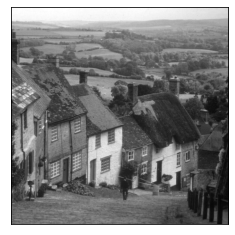

In [7]:
custom_imshow(img)

### b Negativo da Imagem
Para resolver essa etapa foi utilizado o *broadcast* subtraindo de 255 o valor da image. Achando o valor complementar. Logo depois é exibido usando função `custom_imshow` e salvando usando `cv2.imwrite("1.1b.png",img_invertida)`.

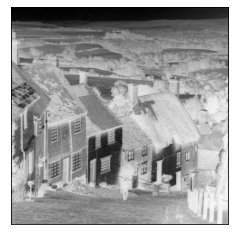

True

In [8]:
img_invertida = 255 - img
custom_imshow(img_invertida)
cv2.imwrite("1.1b.png",img_invertida)

### c Espelhamento Vertical 
Para gera a imagem com espelhamento vertical é utilizado o comando. Basicamente pega o último elemento do vetor e considera como primeiro até chegar no primeiro que será o último elemento do vetor. Usando (`img[::-1]`).

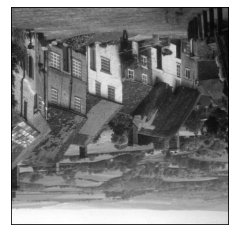

True

In [9]:
img_espelhado_vertical = img[::-1]
custom_imshow(img_espelhado_vertical)
cv2.imwrite("1.1c.png",img_espelhado_vertical)

### d Imagem Transformada
Para está seção foi normalizado para um intervalo de 100 até 200 ou seja os tons de cinza aumentam na imagem. Porque foi pego os extremos 0 preto e 255 branco e foi levado para tons de cinza entre 100 até 200. 

Para isso foi utilizado a equação.

new_img = ((highLim - lowLim)*img)/255 + lowLin


Para está parte foi convertido a imagem para `unsigned int 16 bits` por causa do produto `(highLim - lowLim)*img` depois ao final foi tudo convertido para `unsigned int 8 bits` vai desconsiderar os bits de carry.

In [10]:
def reduceIntesity(img,lowLim=100, highLim=200):
  img = img.astype(np.uint16)
  new_img = ((((highLim - lowLim) * img) / 255)  + lowLim).astype(np.uint8)
  return new_img

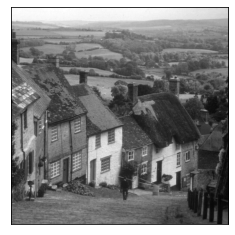

True

In [11]:
reduced_img = reduceIntesity(img)
custom_imshow(reduced_img)
cv2.imwrite("1.1d.png",reduced_img)

### e Linhas pares Invertidas
Para resolver essa parte foi utilizado um laço com tamanho da imagem e foi invertido as linhas pares. `new_img[i][::-1]` a letra `i` indica a linha e `[::-1]` indica inversão da linha. 
```python
for i in range(0,img.shape[0]):
  if i%2==0:
    new_img[i]=new_img[i][::-1]
``` 

In [12]:
def oddTransform(img):
  new_img = img.copy()
  for i in range(0,img.shape[0]):
    if i%2==0:
      new_img[i]=new_img[i][::-1]
  return new_img

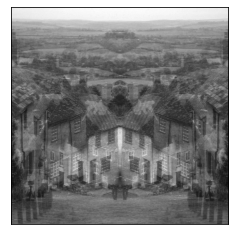

True

In [13]:
odd_img = oddTransform(img)
custom_imshow(odd_img)
cv2.imwrite("1.1e.png",odd_img)

### f Reflexão de linhas
Para resolver essa seção foi percorrido as colunas com `[:,i]` pegando da metade para fim com `[256:]` e sobrescrevendo com a coluna invertida com `[:255:-1]`.

In [14]:
def verticalReflex(img):
  new_img = img.copy()
  for i in range(0,img.shape[1]):
    new_img[:,i][256:] = new_img[:,i][:255:-1]
  return new_img

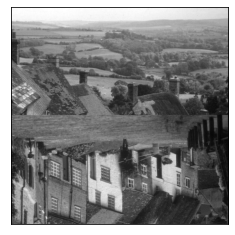

True

In [15]:
vReflex_img = verticalReflex(img)
custom_imshow(vReflex_img)
cv2.imwrite("1.1f.png",vReflex_img)

## Ajuste de Brilho
Para ajustar o brilho da imagem foi utilizado a formula.

fig_img = 1/gamma

Para esse exercício foi normalizado para escala de 0 até 1 com `img / 255` e depois é reconvertido com `img*255`.

O resultado obtido é que quanto maior o gamma  as partes escuras ficam mais escuras e as claras mais claras  redução da gama torna as áreas escuras mais claras e as áreas claras mais escuras.

In [16]:
img2 = cv2.imread("./baboon.png", cv2.COLOR_BGR2GRAY)

In [17]:
def gammaProcess(fix_img,gamma):
  assert (fix_img.min() >=0.0) and (fix_img.max() <= 1.0), "Image must have scale between 0 and 1"
  return fix_img**(1/gamma)
   
def gammaAdjust(img,gamma,lowLim=0, highLim=1):
  img = img.astype(np.float16).copy()
  new_img = (img / 255).astype(np.float16)
  new_img = gammaProcess(new_img,gamma)
  new_img =  new_img*255
  return new_img.astype(np.uint8)

### a Imagem Original
Para a solução desse exercício foi utilizado a imagem `baboon.png` e transformado em tons de cinza `cv2.COLOR_BGR2GRAY`.

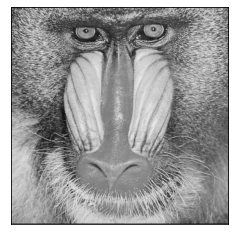

In [18]:
custom_imshow(img2)

### b Gamma 1.5

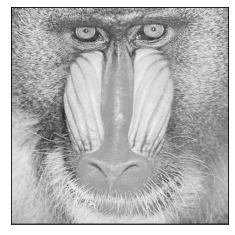

True

In [19]:
gammaApplied = gammaAdjust(img2,1.5)
custom_imshow(gammaApplied)
cv2.imwrite("1.2b.png",gammaApplied)

### c Gamma 2.5

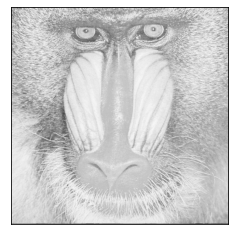

True

In [20]:
gammaApplied = gammaAdjust(img2,2.5)
custom_imshow(gammaApplied)
cv2.imwrite("1.2c.png",gammaApplied)

### d Gamma 3.5

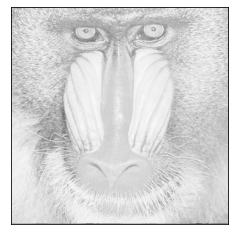

True

In [21]:
gammaApplied = gammaAdjust(img2,3.5)
custom_imshow(gammaApplied)
cv2.imwrite("1.2d.png",gammaApplied)

## Plano de Bits
Para resolução desse exercicio foi utilizado a imagem e uma variável int como entrada é feito a verificação se o bit está dentro do range válido entre 0 até 7 depois é utilizado operação bitwize para colocar o bit na posição certa do binário e esse número é convertido para int e é feito uma operação bitwize and para pegar se o bit foi utilizado ou não. E depois é multiplicado com 255 para exibir a imagem nos tons correto de 0 até 255. Observou que quanto maior o bit mais informação era exibido um fenômeno parecido com processamento de áudio.

In [22]:
def applyMask(img,bit):
  assert (bit>= 0) and (bit <=7), "Bit need to be between (0) and (7)"
  new_img = img&int(format(1 << bit,'08b'),2)
  return new_img*255

### a Imagem Original

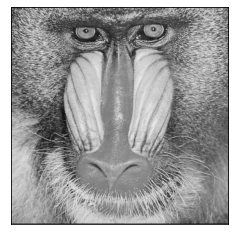

In [23]:
custom_imshow(img2)

### b Plano de bit 0

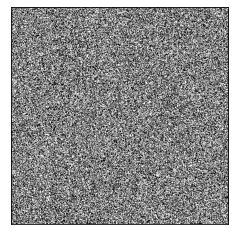

True

In [24]:
img_plan0 = applyMask(img2,0)
custom_imshow(img_plan0)
cv2.imwrite("1.3b.png",img_plan0)

### c Plano de bit 4

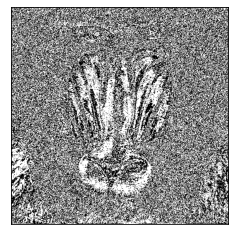

True

In [25]:
img_plan4 = applyMask(img2,4)
custom_imshow(img_plan4)
cv2.imwrite("1.3c.png",img_plan4)

### d Plano de bit 7

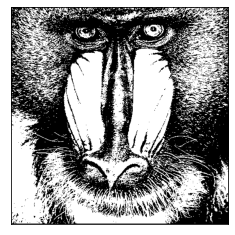

True

In [26]:
img_plan7 = applyMask(img2,7)
custom_imshow(img_plan7)
cv2.imwrite("1.3d.png",img_plan7)

## Mosaico
Para a resolução do exercício foi criado primeiro as representações dos blocos com a função `apply_mosaic` depois é salvo num `dict`. Esse `dict` é utilizado para rearranjar os bloco com a função `mix_img` que dado a imagem e a sequencia que deseja reconstruir a imagem é refeito o rearranjo.
O rearranjo é feito com `mix_img` pegando cada bloco e concatenando até concatenar 4 blocos é feito concateção em outra variável para concatenar blocos de mesmo tamanho de 4 bloco assim é feito reconstrução da imagem na ordem seguindo a variável sequence. 

In [27]:
def apply_mosaic(img):
  index = 0 
  mosaic_map = {}
  div = img.shape[0]//4
  for i in range(0,4):
    for j in range(0,4):
      mosaic_map[index] = img[div*i:div*(i+1),div*j:div*(j+1)]
      index+=1
  return mosaic_map

def mix_img(img, sequence):
  custom_mosaic = np.array(sequence)-1
  temp = np.array([ ])
  new_image = np.array([ ])
  mosaic = apply_mosaic(img)
  for _i, y in enumerate(custom_mosaic):
    if len(temp) == 0:
      temp = mosaic[y]
    elif _i%4 != 0:
      temp = np.concatenate((temp,mosaic[y]),axis=1)
      if _i == len(mosaic) - 1:
        temp = np.concatenate((mosaic[y],temp),axis=1)
        new_image = np.concatenate((new_image,temp),axis=0)
    else:
      if len(new_image) == 0:
        new_image = temp
      else:
        temp = np.concatenate((mosaic[y],temp),axis=1)
        new_image = np.concatenate((new_image,temp),axis=0)
      temp = np.array([])
  return new_image.reshape(512,512)


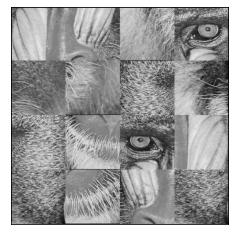

True

In [28]:
mosaic_img = mix_img(img2,[6,11,13,3,8,16,1,9,12,14,2,7,4,15,10,5])
custom_imshow(mosaic_img)
cv2.imwrite("1.4.png",mosaic_img)

## Combinação de imagens
Para combinação de imagem é utilizado *broadcast*, vetorização e também casting de `uint8` para `uint16` depois novamente ser convertido para `uint8`. É combinada a imagem utilizando dois pesos. A imagem com maior peso tende a sobrepor na imagem final.

In [29]:
img3 = cv2.imread("./butterfly.png", cv2.COLOR_BGR2GRAY)

In [30]:
def combineImg(img1,img2,p1,p2):
  return (img1.astype(np.uint16)*p1 + img2.astype(np.uint16)*p2).astype(np.uint8)

### c  0.2\*A + 0.8\*B

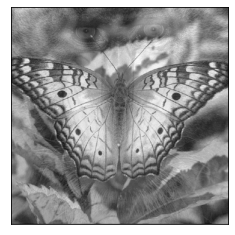

True

In [31]:
custom_imshow(combineImg(img2,img3,0.2,0.8))
cv2.imwrite("1.5c.png",combineImg(img2,img3,0.2,0.8))

### d  0.5\*A + 0.5\*B

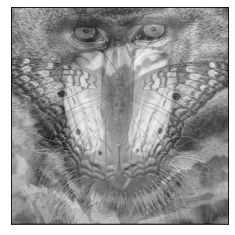

True

In [32]:
custom_imshow(combineImg(img2,img3,0.5,0.5))
cv2.imwrite("1.5d.png",combineImg(img2,img3,0.5,0.5))

### e 0.8\*A + 0.2\*B

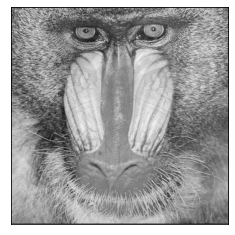

True

In [33]:
custom_imshow(combineImg(img2,img3,0.8,0.2))
cv2.imwrite("1.5e.png",combineImg(img2,img3,0.8,0.2))

In [34]:
!mkdir files
!mv *.png files
!zip projeto0.zip files
if 'google.colab' in sys.modules:
  !zip -r /content/projeto0.zip files
  from google.colab import files
  files.download("/content/projeto0.zip")
else:
  print("Funcionalidade disponível apenas no colab")

zip I/O error: No such file or directory
zip error: Could not create output file (/content/projeto0.zip)
Funcionalidade disponível apenas no colab


In [35]:
!zip projeto0.zip files

  adding: files/ (stored 0%)
